<a href="https://colab.research.google.com/github/juancamcol1/proyectosMLE/blob/main/Proyecto_final_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
datos=pd.read_csv('/content/Pulsar.csv')

In [ ]:
datos.head(5)

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
# Se presentan los datos faltantes por columna
datos.isna().sum()

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

In [ ]:
datos.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


<Axes: >

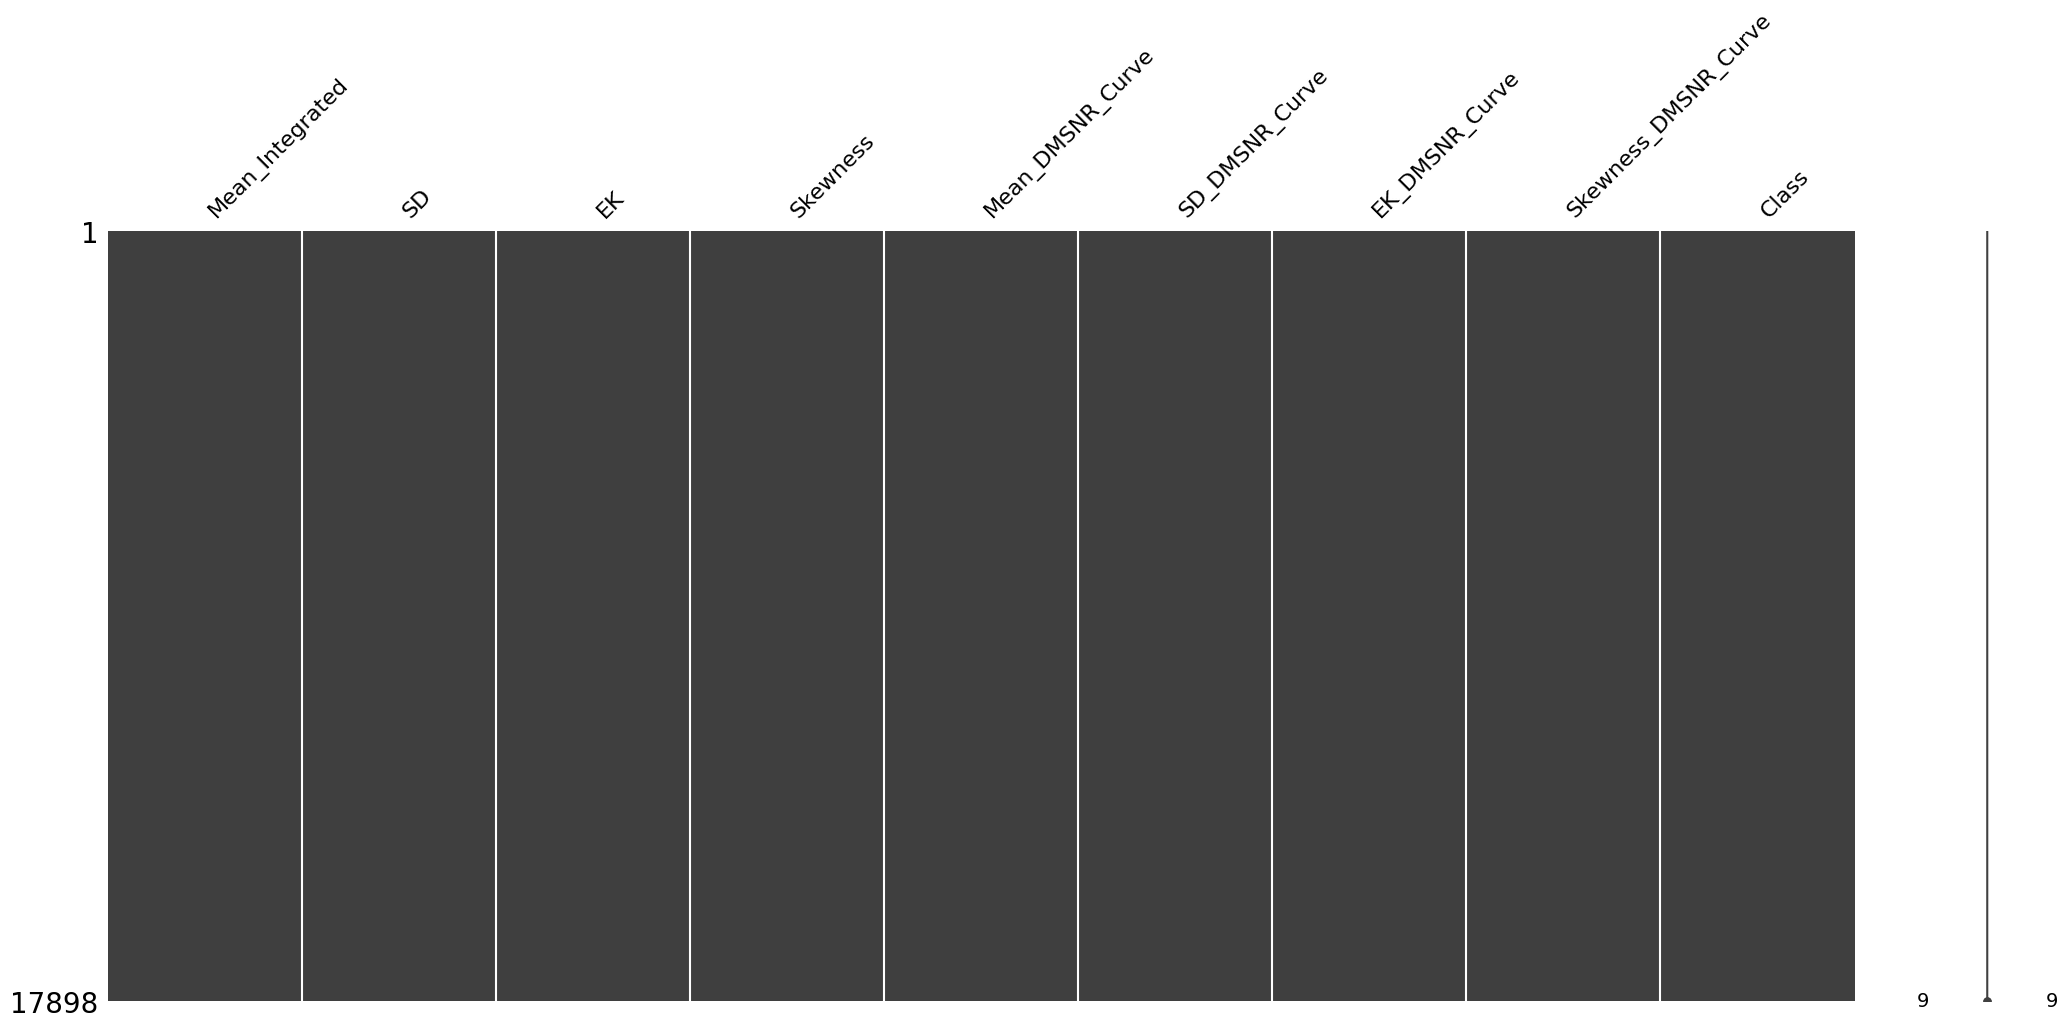

In [ ]:
msno.matrix(datos)


In [ ]:
# se asignan los datos
datos_x=datos.iloc[:,:-1]

datos_y=datos.iloc[:,-1]



In [ ]:
print(datos_x.shape)
print(datos_y.shape)

(17898, 8)
(17898,)


In [ ]:
datos_y= np.array(datos_y).reshape(-1,1)
print(datos_x.shape)
print(datos_y.shape)

(17898, 8)
(17898, 1)


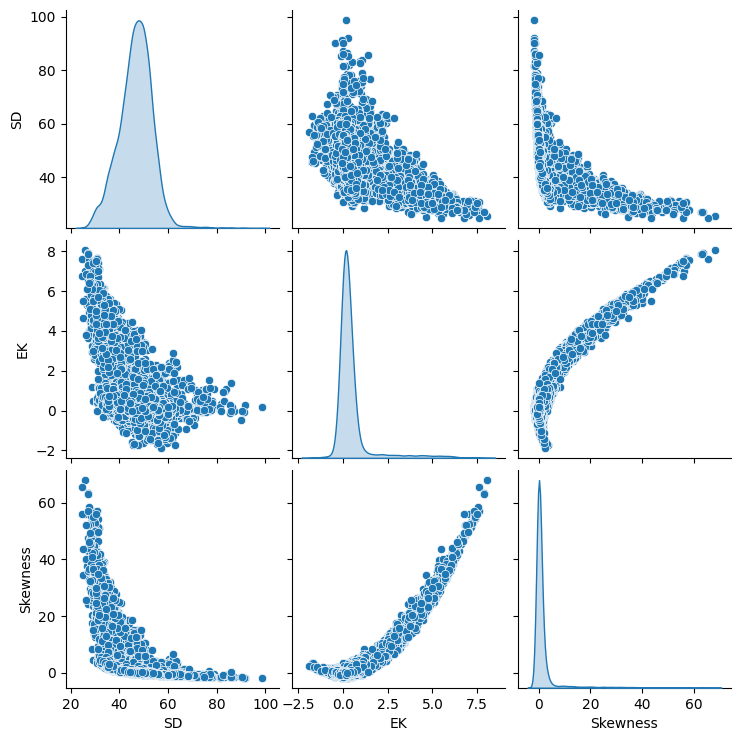

In [ ]:
sns.pairplot(datos_x[['SD','EK','Skewness']],diag_kind='kde')

In [ ]:
#Se divide la muestra en entrenamiento y prueba con 80-20
x_train, x_test, y_train, y_test = train_test_split(datos_x,datos_y, test_size = 0.2, random_state=2)

In [ ]:
print('El tamaño del entrenamiento X', x_train.shape)
print('El tamaño del entrenamiento y', y_train.shape)
print('El tamaño del prueba X',x_test.shape)
print('El tamaño del prueba y',y_test.shape)

El tamaño del entrenamiento X (14318, 8)
El tamaño del entrenamiento y (14318, 1)
El tamaño del prueba X (3580, 8)
El tamaño del prueba y (3580, 1)


In [ ]:
#Se divide la muestra de entrenamiento en entrenamiento y cross_validation
x_train, x_cross_val, y_train, y_cross_val = train_test_split(x_train,y_train, test_size = 0.3, random_state=2)

In [ ]:
print('El tamaño del entrenamiento X', x_train.shape)
print('El tamaño del entrenamiento y', y_train.shape)
print('El tamaño del prueba X',x_test.shape)
print('El tamaño del prueba y',y_test.shape)
print('El tamaño del cross validation X', x_cross_val.shape)
print('El tamaño del cross validation y', y_cross_val.shape)


El tamaño del entrenamiento X (10022, 8)
El tamaño del entrenamiento y (10022, 1)
El tamaño del prueba X (3580, 8)
El tamaño del prueba y (3580, 1)
El tamaño del cross validation X (4296, 8)
El tamaño del cross validation y (4296, 1)


In [ ]:
#Entrenamos el modelo

model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.9770949720670391


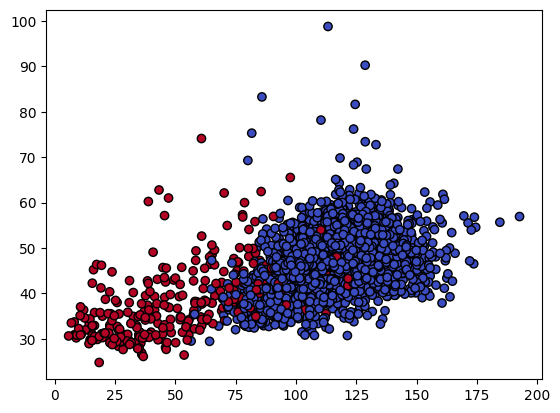

In [ ]:
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=y_test, cmap='coolwarm', marker='o', edgecolors='k', label='Datos de prueba')

Text(0.5, 23.52222222222222, 'Predicciones')

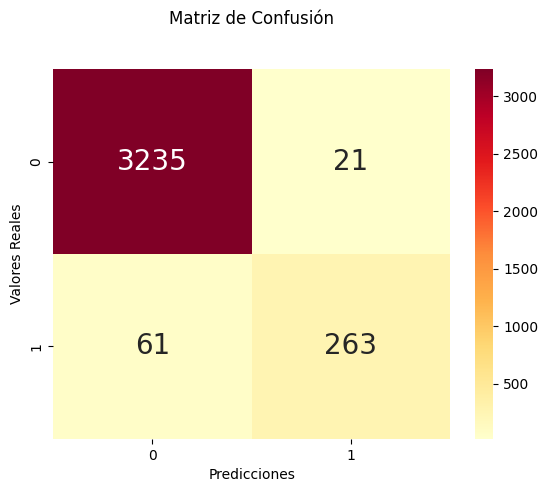

In [ ]:
matriz=confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(matriz),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

In [ ]:
r_score=mean_squared_error(y_test,y_pred)
print('El error medio MRE:', r_score)

El error medio MRE: 0.022905027932960894
